# Supervised Learning: Iris Classification

![iris](fig/iris.jpg)

In this project, we'll prctice supervised learning, an essential component of machine learning. We'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data. For that, we'll be using scikit-learn libraries and Iris dataset. Our goal is to build a classifier that will help us distinguish between the three species of iris — setosa, versicolor, and virginica

### 1. EDA
Before we start a machine learning project, its important to ensure that the data is ready for modeling work. Exploratory Data Analysis (EDA) ensures the readiness of the data for Machine Learning.

In [15]:
# Install packages https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
# !conda install --yes --prefix {sys.prefix} seaborn
# !conda install --yes --prefix {sys.prefix} plotly

In [47]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# importing alll the necessary packages to use the various classification algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy

In [38]:
# load the Iris flower dataset
iris = pd.read_csv("Iris.csv")
display(iris.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# We will strat with some basic numerical EDA
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
# The Id column is redundant
iris.drop('Id', axis=1, inplace=True) axis=1

# Basic statistics of numerical features
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
# Let's explore categorical data
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

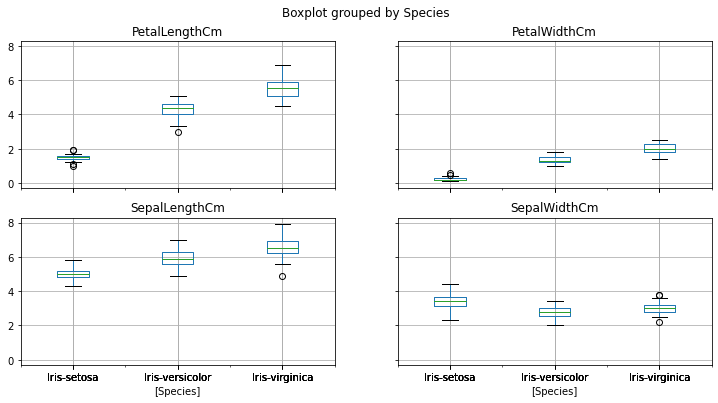

In [42]:
# It's time for vizual EDA
# Let's strat with a simple one that we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="Species", figsize=(12, 6))

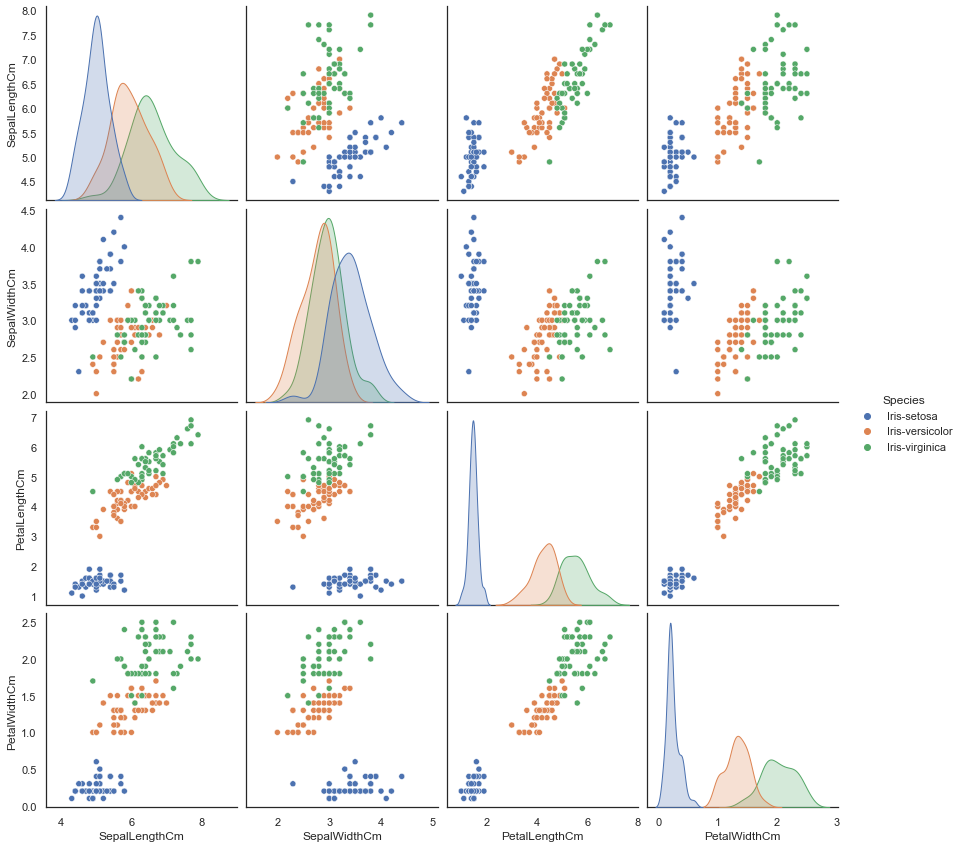

In [43]:
# Let's examine the pairplot, which shows the bivariate relation between each pair of features
sns.set(style="white", color_codes=True)
sns.pairplot(iris, hue="Species", height=3)

Based on the boxplot and pairplot, it seems that we can easily distinguish Iris-setosa from other two species. 

In our final vizualization we will use a `parallel_coordinates` technique. Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample. With interactive visual tool we can easily play with different features to explore their contribution to classification.

In [44]:
# The input for this type of figure must be numerical, thus we encode the 'Species' category.

# Label encoder
le = LabelEncoder()

# Create new features
iris['species_id'] = le.fit_transform(iris["Species"])


print(iris.groupby('Species')['species_id'].unique())

Species
Iris-setosa        [0]
Iris-versicolor    [1]
Iris-virginica     [2]
Name: species_id, dtype: object


In [51]:
fig = px.parallel_coordinates(iris, color="species_id",
                              dimensions=['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm'],
                              #color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=1
                             )
fig.show()

We see that the Petal charactheristics are the most indicative feature for diffirent Iris types seperation.

### 2. Classification
After the data exploration, we are ready for the classification tasks. The featurea for this exercise will be `["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]`, and the target is the `"Species"`: Versicolor, Virginica, and Setosa. 

However, before training any model it is important to check if the features have correlation. It is important steps, that can reduce the computional time and 

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation

In [27]:
px.data.iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3
